In [ ]:
!pip install funcsigs

In [ ]:
!pip install openpyxl

In [2]:
import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import funcsigs
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from funcsigs import signature
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical



In [19]:

df = pd.read_excel(r"C:\Users\Babak\Desktop\COPD_Paro_Studie\statistics_dataset_shortened.xlsx")


In [20]:
target = 'COPD_Diagnose_ja_nein'
features = [i for i in df.columns if i not in [target]]
display(df.head())

original_df = df.copy(deep=True)
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Raceethnicity,Sex,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,Dentatestatus,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,COPD_Diagnose_ja_nein,Bleeding_Percentage,Furcation_SUM,MAL
0,3,1,21,0.641,80.0,120.0,67.0,25.5,1.0,3.0,3.0,9.0,9.0,9.0,5.0,5.0,0,14.285714,0.0,0.21
1,3,2,32,4.803,80.0,126.0,86.0,23.4,2.0,3.0,3.0,28.0,48.0,28.0,12.0,16.0,0,7.142857,0.0,0.13
2,1,2,48,3.747,76.0,131.0,73.0,27.6,1.0,4.0,3.0,42.0,42.0,42.0,20.0,20.0,0,32.142857,0.0,0.86
3,1,1,35,5.406,72.0,130.0,82.0,29.4,1.0,3.0,3.0,21.0,21.0,21.0,11.0,11.0,0,3.571429,0.0,0.35
4,3,1,48,1.676,84.0,120.0,70.0,25.0,2.0,3.0,3.0,11.0,11.0,2.0,4.0,4.0,0,3.571429,0.0,1.85



Inference: The Datset consists of 20 features & 15868 samples.


In [21]:
print(df.shape)
df.info()
df.describe()

(15868, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15868 entries, 0 to 15867
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Raceethnicity                        15868 non-null  int64  
 1   Sex                                  15868 non-null  int64  
 2   AgeatinterviewScreener               15868 non-null  int64  
 3   PovertyIncomeRatiounimputedincome    14426 non-null  float64
 4   Pulseratebeatsminage5years           15406 non-null  float64
 5   OverallaverageK1systolicBPage5       15761 non-null  float64
 6   OverallaverageK5diastolicBPage5      15662 non-null  float64
 7   Bodymassindex                        15819 non-null  float64
 8   Upperquadrantperiodontalassessments  15706 non-null  float64
 9   Lowerquadrantperiodontalassessments  15706 non-null  float64
 10  Dentatestatus                        15706 non-null  float64
 11  SumofpermanentDM

,Raceethnicity,Sex,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,Dentatestatus,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,COPD_Diagnose_ja_nein,Bleeding_Percentage,Furcation_SUM,MAL
count,15868.000000,15868.000000,15868.000000,14426.000000,15406.000000,15761.000000,15662.000000,15819.000000,15706.000000,15706.000000,15706.00000,15703.000000,15703.000000,14913.000000,15703.000000,15703.000000,15868.000000,14806.000000,13660.000000,14781.000000
mean,2.009768,1.527351,40.416310,2.334024,74.156822,121.745765,72.421083,26.509697,1.493951,3.500446,2.84490,38.435267,39.531363,15.498156,11.161561,11.401707,0.116713,9.403282,0.254173,1.070582
std,0.912076,0.499267,19.852071,1.727480,11.825050,18.683349,11.533551,5.907556,0.499979,0.500016,0.47612,37.593890,37.497915,16.541521,8.348461,8.350310,0.321088,13.218245,0.945065,1.154545
min,1.000000,1.000000,13.000000,0.000000,40.000000,67.000000,8.000000,11.700000,1.000000,3.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,24.000000,1.002000,64.000000,109.000000,65.000000,22.400000,1.000000,3.000000,3.00000,8.000000,9.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.330000
50%,2.000000,2.000000,36.000000,1.904000,72.000000,118.000000,72.000000,25.600000,1.000000,4.000000,3.00000,25.000000,27.000000,10.000000,10.000000,10.000000,0.000000,3.571429,0.000000,0.750000
75%,3.000000,2.000000,55.000000,3.240000,80.000000,131.000000,80.000000,29.600000,2.000000,4.000000,3.00000,60.000000,62.000000,22.000000,17.000000,18.000000,0.000000,14.285714,0.000000,1.400000
max,4.000000,2.000000,90.000000,11.889000,144.000000,230.000000,129.000000,79.600000,2.000000,4.000000,3.00000,128.000000,128.000000,114.000000,28.000000,28.000000,1.000000,96.428571,20.000000,13.500000


In [22]:
df.head(10)

,Raceethnicity,Sex,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,Dentatestatus,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,COPD_Diagnose_ja_nein,Bleeding_Percentage,Furcation_SUM,MAL
0,3,1,21,0.641,80.0,120.0,67.0,25.5,1.0,3.0,3.0,9.0,9.0,9.0,5.0,5.0,0,14.285714,0.0,0.21
1,3,2,32,4.803,80.0,126.0,86.0,23.4,2.0,3.0,3.0,28.0,48.0,28.0,12.0,16.0,0,7.142857,0.0,0.13
2,1,2,48,3.747,76.0,131.0,73.0,27.6,1.0,4.0,3.0,42.0,42.0,42.0,20.0,20.0,0,32.142857,0.0,0.86
3,1,1,35,5.406,72.0,130.0,82.0,29.4,1.0,3.0,3.0,21.0,21.0,21.0,11.0,11.0,0,3.571429,0.0,0.35
4,3,1,48,1.676,84.0,120.0,70.0,25.0,2.0,3.0,3.0,11.0,11.0,2.0,4.0,4.0,0,3.571429,0.0,1.85
5,1,2,16,4.563,80.0,111.0,57.0,17.1,1.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,0,14.285714,0.0,0.00
6,3,1,16,0.810,68.0,123.0,53.0,22.3,2.0,3.0,3.0,6.0,6.0,6.0,3.0,3.0,0,14.285714,0.0,0.89
7,2,1,44,0.519,76.0,133.0,85.0,27.1,1.0,3.0,2.0,85.0,85.0,11.0,19.0,19.0,1,17.857143,NaN,1.67
8,3,2,14,1.261,72.0,103.0,55.0,20.7,1.0,4.0,3.0,8.0,8.0,8.0,7.0,7.0,0,0.000000,0.0,0.50
9,2,2,42,3.171,76.0,100.0,67.0,22.6,1.0,4.0,2.0,108.0,108.0,14.0,23.0,23.0,0,7.142857,NaN,0.86


In [23]:
df.nunique().sort_values()

Lowerquadrantperiodontalassessments       2
Sex                                       2
COPD_Diagnose_ja_nein                     2
Upperquadrantperiodontalassessments       2
Dentatestatus                             3
Raceethnicity                             4
Furcation_SUM                            16
Pulseratebeatsminage5years               27
Bleeding_Percentage                      27
SumofpermanentDMFTduetodisease           29
SumofpermanentDMFTduetoanycause          29
AgeatinterviewScreener                   78
SumofpermanentDFS                       101
OverallaverageK5diastolicBPage5         104
SumofpermanentDMFSduetodisease          129
SumofpermanentDFMSduetoanycause         129
OverallaverageK1systolicBPage5          142
Bodymassindex                           402
MAL                                     500
PovertyIncomeRatiounimputedincome      1429
dtype: int64

In [24]:

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 13 numerical & 6 categorical features.


In [ ]:
!pip install statsmodels

In [25]:

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display


from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

                               Visualising Categorical Features:                                


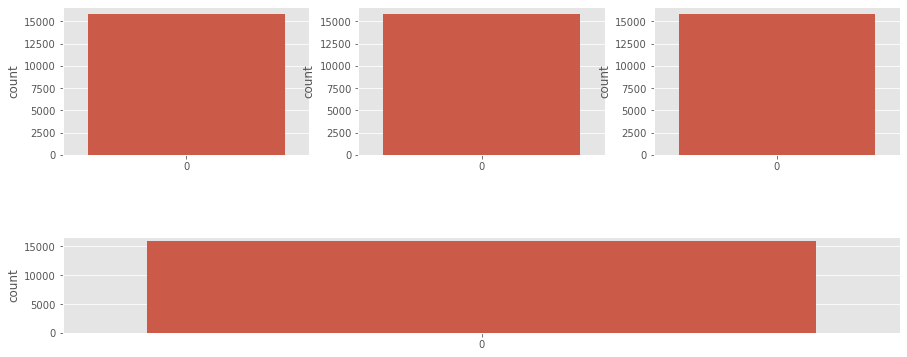

In [26]:

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,3)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


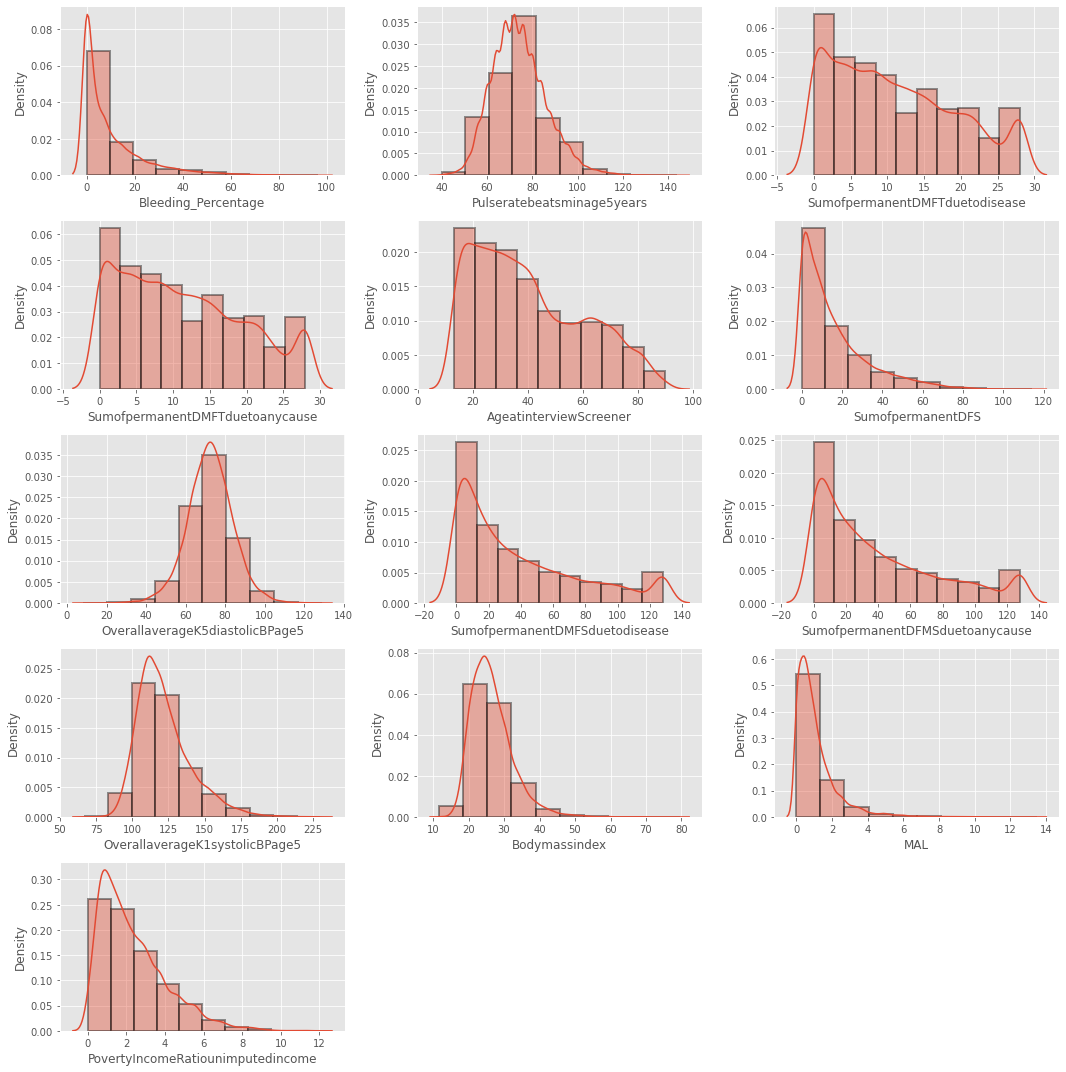

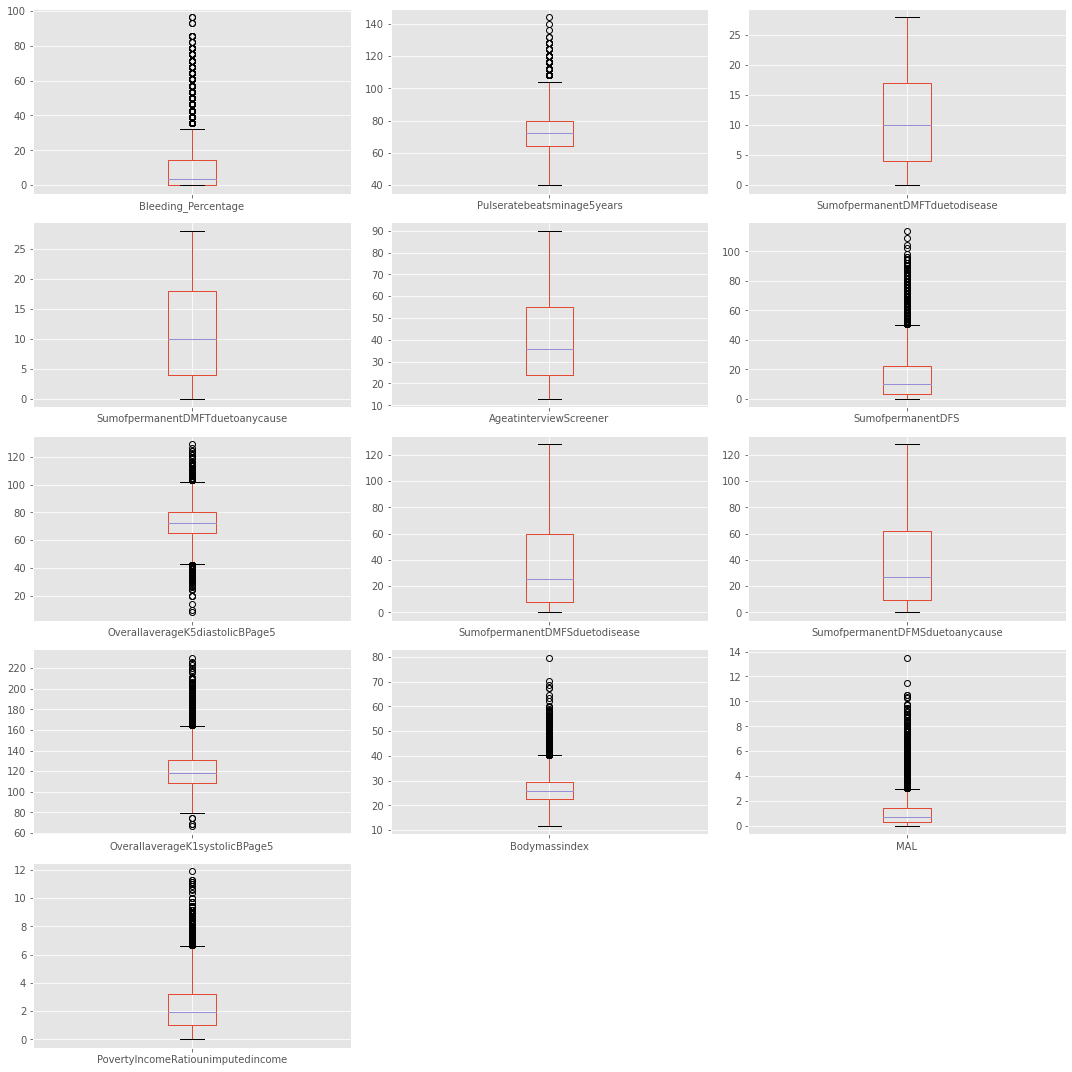

In [27]:
print('\033[1mNumeric Features Distribution'.center(130))

n=3

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [ ]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [29]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                                     Total Null Values  Percentage
Raceethnicity                                        0         0.0
Sex                                                  0         0.0
AgeatinterviewScreener                               0         0.0
COPD_Diagnose_ja_nein                                0         0.0
Bodymassindex                                       49         0.3
OverallaverageK1systolicBPage5                     107         0.7
Dentatestatus                                      162         1.0
Upperquadrantperiodontalassessments                162         1.0
Lowerquadrantperiodontalassessments                162         1.0
SumofpermanentDMFSduetodisease                     165         1.0
SumofpermanentDFMSduetoanycause                    165         1.0
SumofpermanentDMFTduetodisease                     165         1.0
SumofpermanentDMFTduetoanycause                    165         1.0
OverallaverageK5diastolicBPage5                    206        

In [30]:
df.head()

,Raceethnicity,Sex,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,Dentatestatus,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,COPD_Diagnose_ja_nein,Bleeding_Percentage,Furcation_SUM,MAL
0,3,1,21,0.641,80.0,120.0,67.0,25.5,1.0,3.0,3.0,9.0,9.0,9.0,5.0,5.0,0,14.285714,0.0,0.21
1,3,2,32,4.803,80.0,126.0,86.0,23.4,2.0,3.0,3.0,28.0,48.0,28.0,12.0,16.0,0,7.142857,0.0,0.13
2,1,2,48,3.747,76.0,131.0,73.0,27.6,1.0,4.0,3.0,42.0,42.0,42.0,20.0,20.0,0,32.142857,0.0,0.86
3,1,1,35,5.406,72.0,130.0,82.0,29.4,1.0,3.0,3.0,21.0,21.0,21.0,11.0,11.0,0,3.571429,0.0,0.35
4,3,1,48,1.676,84.0,120.0,70.0,25.0,2.0,3.0,3.0,11.0,11.0,2.0,4.0,4.0,0,3.571429,0.0,1.85


In [31]:
df['Raceethnicity'].fillna(df['Raceethnicity'].mode()[0],inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0],inplace=True)
df['Dentatestatus'].fillna(df['Dentatestatus'].mode()[0],inplace=True)

col_to_be_imputed = ['AgeatinterviewScreener', 'PovertyIncomeRatiounimputedincome', 'Pulseratebeatsminage5years','OverallaverageK1systolicBPage5', 'OverallaverageK5diastolicBPage5', 'Bodymassindex','Upperquadrantperiodontalassessments','Lowerquadrantperiodontalassessments','SumofpermanentDMFSduetodisease','SumofpermanentDFMSduetoanycause','SumofpermanentDFMSduetoanycause','SumofpermanentDFS','SumofpermanentDMFTduetodisease','SumofpermanentDMFTduetoanycause','Bleeding_Percentage','Furcation_SUM', 'MAL']
for item in col_to_be_imputed:
    df[item].fillna(df[item].mean(),inplace=True)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Raceethnicity'] = le.fit_transform(df['Raceethnicity'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Dentatestatus'] = le.fit_transform(df['Dentatestatus'])



df['AgeatinterviewScreener'] = df['AgeatinterviewScreener'].astype(int)
df['PovertyIncomeRatiounimputedincome'] = df['PovertyIncomeRatiounimputedincome'].astype(int)
df['Pulseratebeatsminage5years'] = df['Pulseratebeatsminage5years'].astype(int)
df['OverallaverageK1systolicBPage5'] = df['OverallaverageK1systolicBPage5'].astype(int)
df['OverallaverageK5diastolicBPage5'] = df['OverallaverageK5diastolicBPage5'].astype(int)
df['Bodymassindex'] = df['Bodymassindex'].astype(int)
df['Upperquadrantperiodontalassessments'] = df['Upperquadrantperiodontalassessments'].astype(int)
df['Lowerquadrantperiodontalassessments'] = df['Lowerquadrantperiodontalassessments'].astype(int)
df['SumofpermanentDMFSduetodisease'] = df['SumofpermanentDMFSduetodisease'].astype(int)
df['SumofpermanentDFMSduetoanycause'] = df['SumofpermanentDFMSduetoanycause'].astype(int)
df['SumofpermanentDFMSduetoanycause'] = df['SumofpermanentDFMSduetoanycause'].astype(int)
df['SumofpermanentDFS'] = df['SumofpermanentDFS'].astype(int)
df['SumofpermanentDMFTduetodisease'] = df['SumofpermanentDMFTduetodisease'].astype(int)
df['SumofpermanentDMFTduetoanycause'] = df['SumofpermanentDMFTduetoanycause'].astype(int)
df['Bleeding_Percentage'] = df['Bleeding_Percentage'].astype(int)
df['Furcation_SUM'] = df['Furcation_SUM'].astype(int)
df['MAL'] = df['MAL'].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15868 entries, 0 to 15867
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Raceethnicity                        15868 non-null  int64
 1   Sex                                  15868 non-null  int64
 2   AgeatinterviewScreener               15868 non-null  int32
 3   PovertyIncomeRatiounimputedincome    15868 non-null  int32
 4   Pulseratebeatsminage5years           15868 non-null  int32
 5   OverallaverageK1systolicBPage5       15868 non-null  int32
 6   OverallaverageK5diastolicBPage5      15868 non-null  int32
 7   Bodymassindex                        15868 non-null  int32
 8   Upperquadrantperiodontalassessments  15868 non-null  int32
 9   Lowerquadrantperiodontalassessments  15868 non-null  int32
 10  Dentatestatus                        15868 non-null  int64
 11  SumofpermanentDMFSduetodisease       15868 non-null  i

In [35]:
df_feat = df.drop(['Raceethnicity','Sex','Dentatestatus','COPD_Diagnose_ja_nein'],axis=1)
target =  pd.get_dummies(df[['COPD_Diagnose_ja_nein']],drop_first=True)
dummies = pd.get_dummies(df[['Raceethnicity','Sex','Dentatestatus', ]],drop_first=True)


In [36]:
df_feat.head()

,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,Bleeding_Percentage,Furcation_SUM,MAL
0,21,0,80,120,67,25,1,3,9,9,9,5,5,14,0,0
1,32,4,80,126,86,23,2,3,28,48,28,12,16,7,0,0
2,48,3,76,131,73,27,1,4,42,42,42,20,20,32,0,0
3,35,5,72,130,82,29,1,3,21,21,21,11,11,3,0,0
4,48,1,84,120,70,25,2,3,11,11,2,4,4,3,0,1


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[:19])
df_preprocessed = pd.concat([df_scaled,dummies,target], axis=1)
df_preprocessed.head()

,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,Bleeding_Percentage,Furcation_SUM,MAL,Raceethnicity,Sex,Dentatestatus,COPD_Diagnose_ja_nein
0,-0.978080,-1.114003,0.501897,-0.093489,-0.472642,-0.178992,-0.978058,-0.990716,-0.786986,-0.818359,-0.403355,-0.741735,-0.770173,0.385204,-0.248298,-0.625045,2,0,2,0
1,-0.423965,1.299898,0.501897,0.228750,1.185563,-0.517580,1.022435,-0.990716,-0.278921,0.227181,0.781484,0.101162,0.554073,-0.168070,-0.248298,-0.625045,2,1,2,0
2,0.382022,0.696423,0.158587,0.497282,0.051001,0.159596,-0.978058,1.009371,0.095443,0.066329,1.654524,1.064472,1.035617,1.807911,-0.248298,-0.625045,0,1,2,0
3,-0.272842,1.903373,-0.184723,0.443575,0.836467,0.498184,-0.978058,-0.990716,-0.466103,-0.496654,0.344964,-0.019252,-0.047857,-0.484228,-0.248298,-0.625045,0,0,2,0
4,0.382022,-0.510528,0.845207,-0.093489,-0.210820,-0.178992,1.022435,-0.990716,-0.733506,-0.764741,-0.839875,-0.862149,-0.890559,-0.484228,-0.248298,0.287478,2,0,2,0


In [38]:
display(df_preprocessed.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,Bleeding_Percentage,Furcation_SUM,MAL,Raceethnicity,Sex,Dentatestatus,COPD_Diagnose_ja_nein
0,-0.978080,-1.114003,0.501897,-0.093489,-0.472642,-0.178992,-0.978058,-0.990716,-0.786986,-0.818359,-0.403355,-0.741735,-0.770173,0.385204,-0.248298,-0.625045,2,0,2,0
1,-0.423965,1.299898,0.501897,0.228750,1.185563,-0.517580,1.022435,-0.990716,-0.278921,0.227181,0.781484,0.101162,0.554073,-0.168070,-0.248298,-0.625045,2,1,2,0
2,0.382022,0.696423,0.158587,0.497282,0.051001,0.159596,-0.978058,1.009371,0.095443,0.066329,1.654524,1.064472,1.035617,1.807911,-0.248298,-0.625045,0,1,2,0
3,-0.272842,1.903373,-0.184723,0.443575,0.836467,0.498184,-0.978058,-0.990716,-0.466103,-0.496654,0.344964,-0.019252,-0.047857,-0.484228,-0.248298,-0.625045,0,0,2,0
4,0.382022,-0.510528,0.845207,-0.093489,-0.210820,-0.178992,1.022435,-0.990716,-0.733506,-0.764741,-0.839875,-0.862149,-0.890559,-0.484228,-0.248298,0.287478,2,0,2,0



Inference: The Datset consists of 20 features & 15868 samples.


In [39]:
df_preprocessed.describe()

,AgeatinterviewScreener,PovertyIncomeRatiounimputedincome,Pulseratebeatsminage5years,OverallaverageK1systolicBPage5,OverallaverageK5diastolicBPage5,Bodymassindex,Upperquadrantperiodontalassessments,Lowerquadrantperiodontalassessments,SumofpermanentDMFSduetodisease,SumofpermanentDFMSduetoanycause,SumofpermanentDFS,SumofpermanentDMFTduetodisease,SumofpermanentDMFTduetoanycause,Bleeding_Percentage,Furcation_SUM,MAL,Raceethnicity,Sex,Dentatestatus,COPD_Diagnose_ja_nein
count,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,1.586800e+04,15868.000000,15868.000000,15868.000000,15868.000000
mean,9.313895e-17,7.612318e-18,4.442012e-16,3.653913e-16,4.827105e-16,-1.182148e-16,4.656948e-17,-4.343499e-16,-7.164535e-17,-2.865814e-17,-4.298721e-17,2.865814e-17,1.432907e-17,-7.164535e-18,-1.343350e-17,-7.164535e-18,1.009768,0.527351,1.846483,0.116713
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,0.912076,0.499267,0.473940,0.321088
min,-1.381074e+00,-1.114003e+00,-2.931201e+00,-2.939927e+00,-5.621804e+00,-2.549108e+00,-9.780577e-01,-9.907161e-01,-1.027649e+00,-1.059637e+00,-9.645948e-01,-1.343804e+00,-1.372102e+00,-7.213453e-01,-2.482976e-01,-6.250448e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.269579e-01,-5.105276e-01,-5.280324e-01,-6.842589e-01,-6.471900e-01,-6.868739e-01,-9.780577e-01,-9.907161e-01,-8.137267e-01,-8.183586e-01,-7.151550e-01,-8.621487e-01,-8.905586e-01,-7.213453e-01,-2.482976e-01,-6.250448e-01,0.000000,0.000000,2.000000,0.000000
50%,-2.224679e-01,9.294766e-02,-1.847226e-01,-2.009014e-01,-3.627247e-02,-1.789920e-01,-9.780577e-01,-9.907161e-01,-3.324016e-01,-3.089929e-01,-2.786352e-01,-1.396658e-01,-1.682429e-01,-4.842275e-01,-2.482976e-01,-6.250448e-01,1.000000,1.000000,2.000000,0.000000
75%,7.346412e-01,6.964229e-01,5.018969e-01,4.972816e-01,6.619190e-01,4.981839e-01,1.022435e+00,1.009371e+00,5.767681e-01,5.756947e-01,3.449644e-01,7.032310e-01,7.948446e-01,3.852043e-01,-2.482976e-01,2.874780e-01,2.000000,1.000000,2.000000,0.000000
max,2.497737e+00,5.524225e+00,5.994853e+00,5.814214e+00,4.938342e+00,8.962883e+00,1.022435e+00,1.009371e+00,2.395108e+00,2.371879e+00,6.144441e+00,2.027783e+00,1.998704e+00,6.866423e+00,2.244748e+01,1.123775e+01,3.000000,1.000000,2.000000,1.000000


In [40]:
y = df_preprocessed['COPD_Diagnose_ja_nein']
X = df_preprocessed.drop('COPD_Diagnose_ja_nein', 1)


print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (15868,)
X - No Label No id  (15868, 19)
Index(['AgeatinterviewScreener', 'PovertyIncomeRatiounimputedincome',
       'Pulseratebeatsminage5years', 'OverallaverageK1systolicBPage5',
       'OverallaverageK5diastolicBPage5', 'Bodymassindex',
       'Upperquadrantperiodontalassessments',
       'Lowerquadrantperiodontalassessments', 'SumofpermanentDMFSduetodisease',
       'SumofpermanentDFMSduetoanycause', 'SumofpermanentDFS',
       'SumofpermanentDMFTduetodisease', 'SumofpermanentDMFTduetoanycause',
       'Bleeding_Percentage', 'Furcation_SUM', 'MAL', 'Raceethnicity', 'Sex',
       'Dentatestatus'],
      dtype='object')


In [41]:

print(df_preprocessed.shape)
print(X.shape)
print(y.shape)


(15868, 20)
(15868, 19)
(15868,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (12694, 19)
X_test:  (3174, 19)
y_train:  (12694,)
y_test:  (3174,)


In [43]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: COPD_Diagnose_ja_nein, dtype: int64

In [44]:
seed = 42
scoring = 'roc_auc' 

Mymodels = []
Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForestClassifier', RandomForestClassifier()))
Mymodels.append(('SGDclassifier', SGDClassifier()))
Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
Mymodels.append(('GaussianNB', GaussianNB()))
Mymodels.append(('SVM', SVC()))

results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LogReg: 0.834524 (0.005286)
RandomForestClassifier: 0.818559 (0.007185)
SGDclassifier: 0.803498 (0.011287)
KNearestNeighbors: 0.723334 (0.012966)
DecisionTreeClassifier: 0.607938 (0.004470)
GaussianNB: 0.807075 (0.013240)
SVM: 0.684897 (0.021818)


In [45]:
model = RandomForestClassifier()

param_grid = [{},]

grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring)
grid_search.fit(X, y)

print(grid_search.best_estimator_)

RandomForestClassifier()


In [46]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
trainFinalFI = X
yFinalFI = y

model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.005].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [ ]:
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.001])

In [49]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=5, test_size=0.2)
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=4)
plot_learning_curve(model, title, X, y, ylim=(0.01, 0.99), cv=cv, n_jobs=4)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (12694, 19)
X_test:  (3174, 19)
y_train:  (12694,)
y_test:  (3174,)


In [53]:
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

conf_mx = confusion_matrix(y_test, final_predictions)
print('conf_mx ready')

conf_mx ready


In [54]:
def plot_confusion_matrix(cm,target_names,title='Confusion Matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


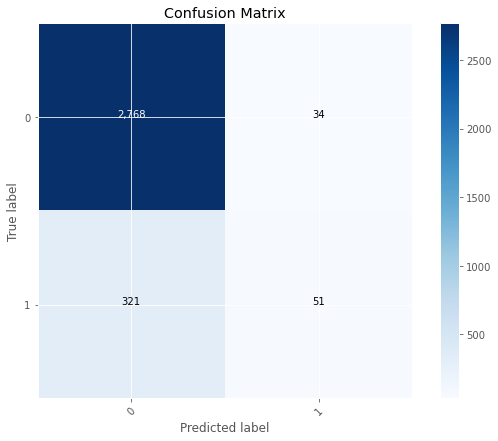

In [55]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")

Class  0


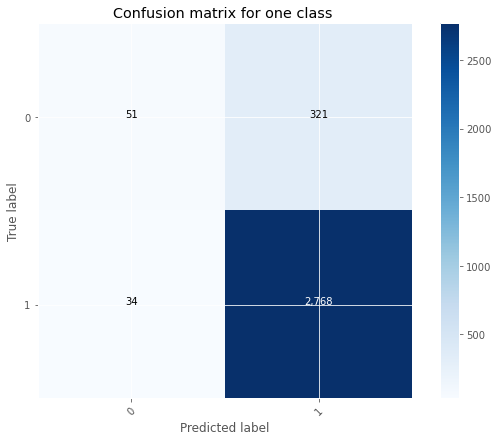

TPz  2768
FNz  34
FPz  321
TNz  51
sum  3174
[[  51  321]
 [  34 2768]]
Sum of CM  3174
accuracy  0.8882
recall  0.9879
precision  0.8961
F1Score  0.9397
----------------------------------------
Class  1


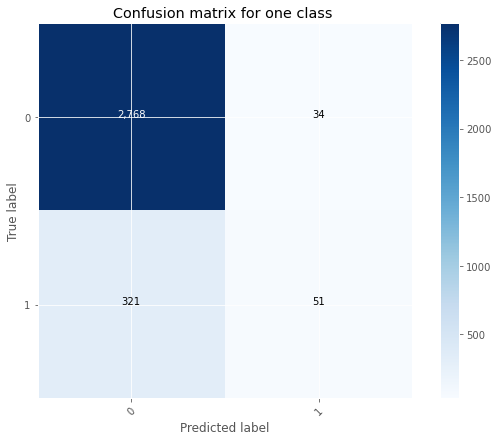

TPz  51
FNz  321
FPz  34
TNz  2768
sum  3174
[[2768   34]
 [ 321   51]]
Sum of CM  3174
accuracy  0.8882
recall  0.1371
precision  0.6
F1Score  0.2232
----------------------------------------
TN:  2819
FP:  355
FN:  355
TP:  2819
________________________________________


In [56]:
NumClasses = 2

TP = 0
TN = 0
FP = 0
FN = 0

for z in range(NumClasses):
# One class at a time - calculate confusion matrix
    SumCM = np.sum(conf_mx)
    TPz = conf_mx[z,z]
    FNz = np.sum(conf_mx[z,:], axis=0) -TPz
    FPz = np.sum(conf_mx[:,z], axis=0) -TPz
    TNz = SumCM - (TPz+FNz+FPz)
    #FPz = np.sum(conf_mx[z], axis=-1) 
    #FPz = sum(conf_mx(:, z))-conf_mx(z, z)
    #FNz = sum(conf_mx(x, :), 2)-conf_mx(x, x)
    print('Class ',z)
  

    # Create conf matrix for class z
    cmZ = np.zeros([2, 2], dtype=np.int32)
    cmZ[0,0] = TNz
    cmZ[0,1] = FPz
    cmZ[1,0] = FNz
    cmZ[1,1] = TPz

    plot_confusion_matrix(cmZ, 
                          normalize    = False,
                          target_names = [0,1],
                          title        = "Confusion matrix for one class ")

    accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
    recall = TPz/(TPz+FNz)
    precision = TPz/(TPz+FPz)
    f1score = 2*recall*precision/(recall+precision)
    #roc_auc = auc(FPz, TPz)
    
    print('TPz ',TPz)
    print('FNz ',FNz)
    print('FPz ',FPz)
    print('TNz ',TNz)
    print('sum ', TPz+TNz+FPz+FNz)
    print(cmZ)
    print('Sum of CM ', np.sum(cmZ))
    print ('accuracy ',round(accuracy,4))
    print('recall ', round(recall,4))
    print('precision ', round(precision,4))
    print('F1Score ', round(f1score,4))
    print('-'*40)
    
    TP = TP + TPz
    TN = TN + TNz
    FP = FP + FPz
    FN = FN + FNz
print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)
print('_'*40)    

Confusion Matix for ALL Classes


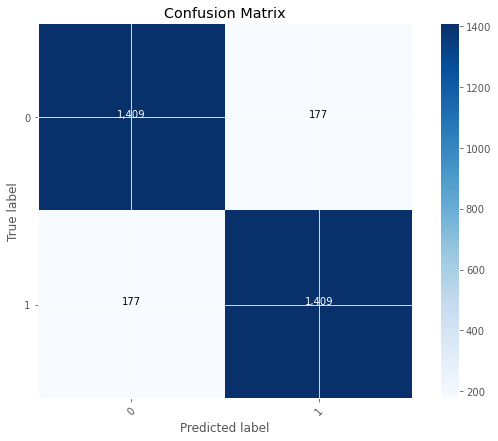

TPz  51
FNz  321
FPz  34
TNz  2768
sum  3174
[[2768   34]
 [ 321   51]]
Sum of CM  3174
accuracy  0.8882
recall  0.1371
precision  0.6
F1Score  0.2232
----------------------------------------
TN:  4177.5
FP:  211.5
FN:  498.5
TP:  1460.5
________________________________________


In [57]:


print('Confusion Matix for ALL Classes')

TP = TP / NumClasses
TN = TN / NumClasses
FP = FP / NumClasses
FN = FN / NumClasses


cm = np.zeros([2, 2], dtype=np.int32)
cm[0,0] = TN
cm[0,1] = FP
cm[1,0] = FN
cm[1,1] = TP

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")
accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
recall = TPz/(TPz+FNz)
precision = TPz/(TPz+FPz)
f1score = 2*recall*precision/(recall+precision)
#roc_auc = auc(FPz, TPz)
    
print('TPz ',TPz)
print('FNz ',FNz)
print('FPz ',FPz)
print('TNz ',TNz)
print('sum ', TPz+TNz+FPz+FNz)
print(cmZ)
print('Sum of CM ', np.sum(cmZ))
print ('accuracy ',round(accuracy,4))
print('recall ', round(recall,4))
print('precision ', round(precision,4))
print('F1Score ', round(f1score,4))
print('-'*40)
    
TP = TP + TPz
TN = TN + TNz
FP = FP + FPz
FN = FN + FNz
print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)
print('_'*40)


**NN model**  

In [58]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

print(y_train)
print(y_test)


X_train:  (12694, 19)
X_test:  (3174, 19)
y_train:  (12694,)
y_test:  (3174,)
944      0
2168     0
5814     0
4540     0
2333     0
        ..
13418    0
5390     0
860      0
15795    0
7270     0
Name: COPD_Diagnose_ja_nein, Length: 12694, dtype: int64
2360     0
11478    0
5297     0
10909    1
4069     0
        ..
7735     0
10801    0
5479     0
9814     0
14316    0
Name: COPD_Diagnose_ja_nein, Length: 3174, dtype: int64


In [59]:


x_val = X_test
partial_x_train = X_train
y_val = y_test
partial_y_train = y_train

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

partial_x_train  (12694, 19)
partial_y_train  (12694,)
x_val  (3174, 19)
y_val  (3174,)


In [60]:
yTrain = to_categorical(partial_y_train)
yVal = to_categorical(y_val)
print(yTrain.shape)
print(yVal.shape)

(12694, 2)
(3174, 2)


In [61]:


model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(19,)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
print(model.summary())

# FIT/TRAIN model

NumEpochs = 20
BatchSize = 128
lr=1e-4
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy', tf.keras.metrics.AUC(name='auc')])

history = model.fit(partial_x_train, yTrain, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, yVal))

results = model.evaluate(x_val, yVal)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              40960     
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 2048)              4

dict_keys(['loss', 'categorical_accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_auc'])

In [62]:
evalu = model.evaluate(x_val, yVal)
print(model.metrics_names)
print(evalu)

100/100 [==============================] - 1s 11ms/step - loss: 0.3443 - categorical_accuracy: 0.8866 - auc: 0.9534
['loss', 'categorical_accuracy', 'auc']
[0.3443364202976227, 0.8865784406661987, 0.953364372253418]


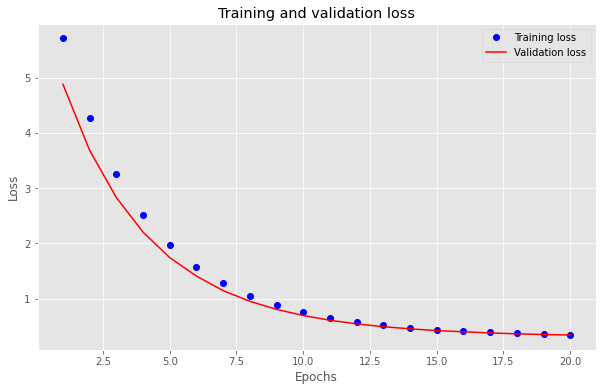

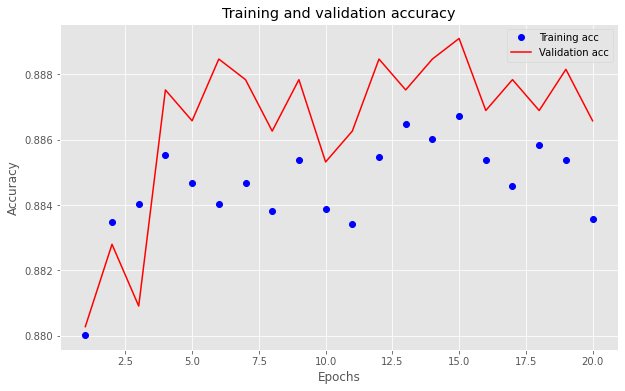

In [63]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['categorical_accuracy']
val_acc_values = history_dict['val_categorical_accuracy']
epochs = range(1, (len(history_dict['categorical_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [64]:
# Final Fit / Predict

final_predictions = model.predict(x_val)
print(final_predictions)

100/100 [==============================] - 1s 10ms/step
[[0.87461126 0.1253888 ]
 [0.9854881  0.01451187]
 [0.6181233  0.38187677]
 ...
 [0.9029198  0.09708025]
 [0.9698335  0.03016642]
 [0.75135094 0.24864905]]


In [65]:
# PREDICT & ARGMAX to get the digit from the probability of softmax layer

print(final_predictions)
pred = []
numTest = final_predictions.shape[0]
for i in range(numTest):
    pred.append(np.argmax(final_predictions[i])) 
predictions = np.array(pred)  
print(predictions)

[[0.87461126 0.1253888 ]
 [0.9854881  0.01451187]
 [0.6181233  0.38187677]
 ...
 [0.9029198  0.09708025]
 [0.9698335  0.03016642]
 [0.75135094 0.24864905]]
[0 0 0 ... 0 0 0]


In [66]:
# PREDICT & ARGMAX to get the digit from the probability of softmax layer

print(yVal)
pred = []
numTest = yVal.shape[0]
for i in range(numTest):
    pred.append(np.argmax(yVal[i])) 
yValNum = np.array(pred)  
print(yValNum)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0 0 0 ... 0 0 0]


In [67]:
conf_mx = confusion_matrix(yValNum, predictions)
print('conf_mx ready')

conf_mx ready


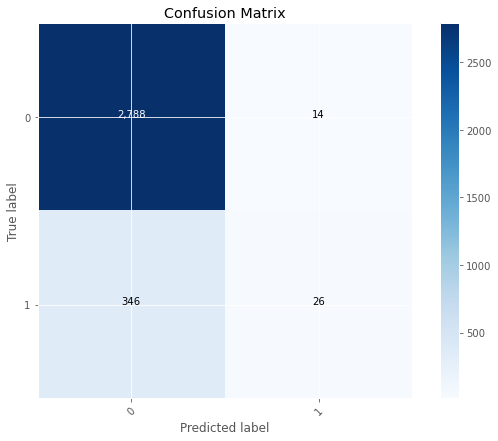

In [68]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")

Class  0


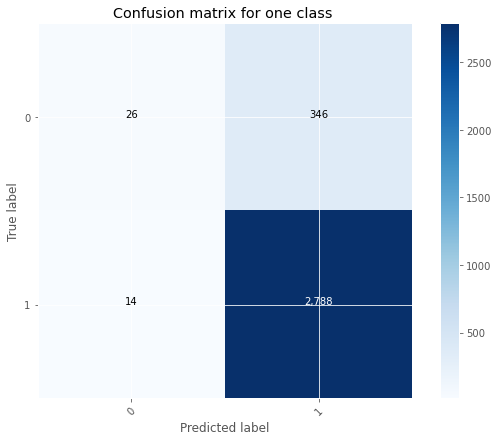

TPz  2788
FNz  14
FPz  346
TNz  26
sum  3174
[[  26  346]
 [  14 2788]]
Sum of CM  3174
accuracy  0.8866
recall  0.995
precision  0.8896
F1Score  0.9394
----------------------------------------
Class  1


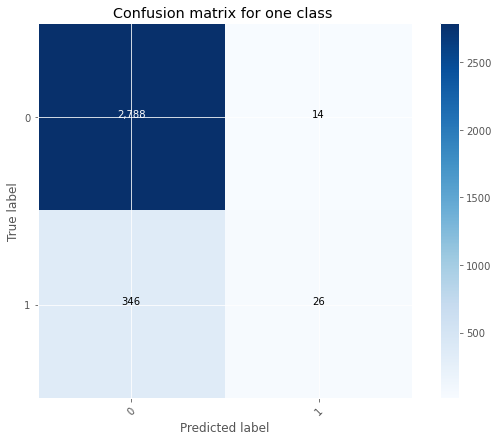

TPz  26
FNz  346
FPz  14
TNz  2788
sum  3174
[[2788   14]
 [ 346   26]]
Sum of CM  3174
accuracy  0.8866
recall  0.0699
precision  0.65
F1Score  0.1262
----------------------------------------


In [69]:
# Confusion matrix and all metrics - for EACH class separately

NumClasses = 2

TP = 0
TN = 0
FP = 0
FN = 0

for z in range(NumClasses):
# One class at a time - calculate confusion matrix
    SumCM = np.sum(conf_mx)
    TPz = conf_mx[z,z]
    FNz = np.sum(conf_mx[z,:], axis=0) -TPz
    FPz = np.sum(conf_mx[:,z], axis=0) -TPz
    TNz = SumCM - (TPz+FNz+FPz)
    #FPz = np.sum(conf_mx[z], axis=-1) 
    #FPz = sum(conf_mx(:, z))-conf_mx(z, z)
    #FNz = sum(conf_mx(x, :), 2)-conf_mx(x, x)
    print('Class ',z)
  

    # Create conf matrix for class z
    cmZ = np.zeros([2, 2], dtype=np.int32)
    cmZ[0,0] = TNz
    cmZ[0,1] = FPz
    cmZ[1,0] = FNz
    cmZ[1,1] = TPz

    plot_confusion_matrix(cmZ, 
                          normalize    = False,
                          target_names = [0,1],
                          title        = "Confusion matrix for one class ")

    accuracy = (TPz+TNz)/(TPz+TNz+FPz+FNz)
    recall = TPz/(TPz+FNz)
    precision = TPz/(TPz+FPz)
    f1score = 2*recall*precision/(recall+precision)
    #roc_auc = auc(FPz, TPz)
    
    print('TPz ',TPz)
    print('FNz ',FNz)
    print('FPz ',FPz)
    print('TNz ',TNz)
    print('sum ', TPz+TNz+FPz+FNz)
    print(cmZ)
    print('Sum of CM ', np.sum(cmZ))
    print ('accuracy ',round(accuracy,4))
    print('recall ', round(recall,4))
    print('precision ', round(precision,4))
    print('F1Score ', round(f1score,4))
    print('-'*40)
    
    TP = TP + TPz
    TN = TN + TNz
    FP = FP + FPz
    FN = FN + FNz
    

In [ ]:
# Confusion Matrix for the WHOLE MODEL - ALL Classes

print('Confusion Matix for ALL Classes')

TP = TP / NumClasses
TN = TN / NumClasses
FP = FP / NumClasses
FN = FN / NumClasses


cm = np.zeros([2, 2], dtype=np.int32)
cm[0,0] = TN
cm[0,1] = FP
cm[1,0] = FN
cm[1,1] = TP

plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = [0,1],
                      title        = "Confusion Matrix")


In [ ]:
from sklearn.metrics import roc_auc_score
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test = lb.transform(y_test)
        y_pred = lb.transform(y_pred)
        return roc_auc_score(y_test, y_pred, average=average)

print('AUC ROC ',multiclass_roc_auc_score(yValNum, predictions))